In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from wordcloud import WordCloud



In [2]:
# Step 1: Load the dataset
file_path = 'spam.csv'  
df = pd.read_csv(file_path, encoding='latin-1')
print(df)



        v1                                                 v2 Unnamed: 2  \
0      ham  Go until jurong point, crazy.. Available only ...        NaN   
1      ham                      Ok lar... Joking wif u oni...        NaN   
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3      ham  U dun say so early hor... U c already then say...        NaN   
4      ham  Nah I don't think he goes to usf, he lives aro...        NaN   
...    ...                                                ...        ...   
5567  spam  This is the 2nd time we have tried 2 contact u...        NaN   
5568   ham              Will Ì_ b going to esplanade fr home?        NaN   
5569   ham  Pity, * was in mood for that. So...any other s...        NaN   
5570   ham  The guy did some bitching but I acted like i'd...        NaN   
5571   ham                         Rofl. Its true to its name        NaN   

     Unnamed: 3 Unnamed: 4  
0           NaN        NaN  
1           NaN        NaN  


In [3]:
print(df.shape)
print(df.size)

(5572, 5)
27860


In [4]:
df.describe()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
count,5572,5572,50,12,6
unique,2,5169,43,10,5
top,ham,"Sorry, I'll call later","bt not his girlfrnd... G o o d n i g h t . . .@""","MK17 92H. 450Ppw 16""","GNT:-)"""
freq,4825,30,3,2,2


In [5]:
# Step 2: Keep relevant columns and clean the data
df = df[['v1', 'v2']]  # Keep only label and text columns
df.columns = ['label', 'text']  # Rename columns for clarity
df = df.dropna()  # Drop any rows with missing values



In [6]:
# Step 3: Convert the text into numerical features using CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df['text'])  # Features
y = df['label']  # Labels (spam or ham)



In [7]:
# Step 4: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [8]:
# Step 5: Train the Multinomial Naive Bayes model
model = MultinomialNB()
model.fit(X_train, y_train)



MultinomialNB()

In [9]:
# Step 6: Predict on the test set and calculate accuracy
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)



In [10]:
# Print the accuracy as a percentage
print(f"Model Accuracy: {accuracy * 100:.2f}%")  # Displaying the accuracy in percentage format



Model Accuracy: 97.85%


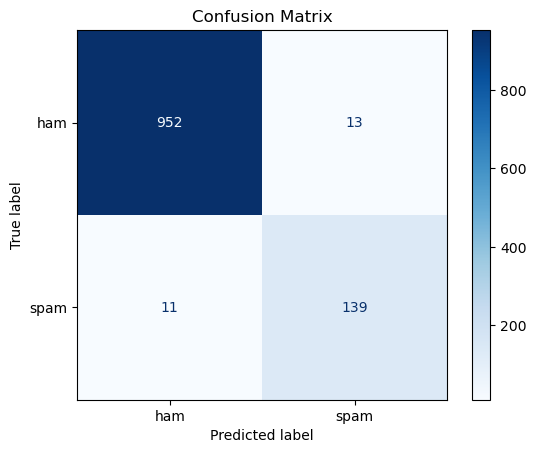

In [11]:
# Step 7: Display Confusion Matrix
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
cmd = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
cmd.plot(cmap="Blues")
plt.title("Confusion Matrix")
plt.show()



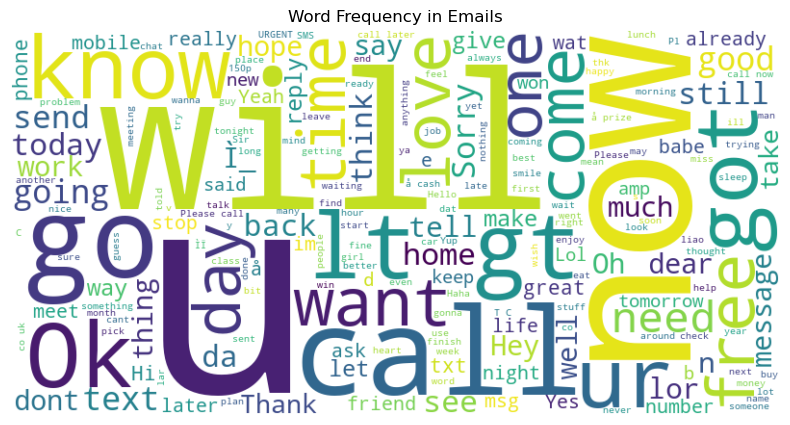

In [12]:
# Step 8: Visualize word frequency using WordCloud
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(" ".join(df['text']))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.title("Word Frequency in Emails")
plt.axis("off")
plt.show()



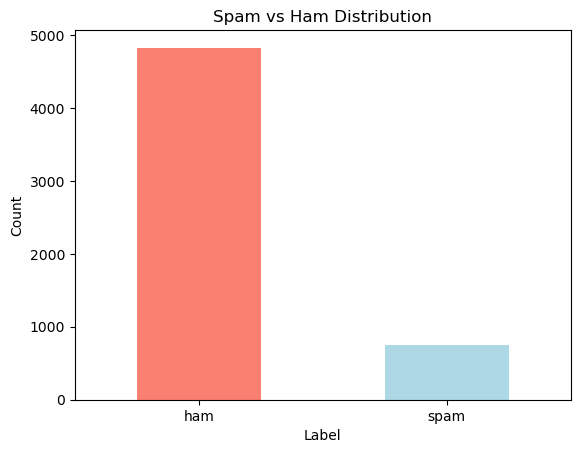

In [13]:
# Step 9: Plot the class distribution (Spam vs Ham)
df['label'].value_counts().plot(kind='bar', color=['salmon', 'lightblue'])
plt.title("Spam vs Ham Distribution")
plt.xlabel("Label")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.show()



In [14]:
# Step 10: Function to predict custom email input
def predict_email(email, vectorizer, model):
    email = email.lower()  # Preprocess email text (lowercase)
    email_vector = vectorizer.transform([email])  # Convert email to numerical features
    prediction = model.predict(email_vector)
    return "Spam" if prediction[0] == 'spam' else "Ham"



In [15]:
# Step 11: Get user input and predict
user_email = input("Enter an email to predict if it is Spam or Ham: ")
prediction = predict_email(user_email, vectorizer, model)
print(f"The email is: {prediction}")


Enter an email to predict if it is Spam or Ham: hello
The email is: Ham
